## Análisis Exploratorio

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
pandas.__version__

'1.1.3'

In [3]:
seaborn.__version__

'0.11.0'

### Lectura de Fuente de Datos

#### 120 años de olimpiadas: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [4]:
olympics = pandas.read_csv('Materiales Cap 3/olympics.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#Una vez leído los datos, vamos a inspeccionar:
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
olympics.shape

(271116, 15)

In [7]:
olympics.index

RangeIndex(start=0, stop=271116, step=1)

#### Tipos de Variable: info

In [8]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


##### Notamos que en la columna Age, Height, Weight y Medal, hay valores Null, ya que no están completos.

#### Para saber cuál es la cantidad Nula, fácilmente podríamos restar la cantidad de datos del DataFrame menos la cantidad de datos NoNulos de cada columna, listo.

### Pero usaremos otro método:

In [9]:
#Valores Nulos:
olympics.isnull().head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
#Recuerda:
int(True)

1

In [11]:
int(False)

0

#### Entonces si sumamos la cantidad de verdaderos y falsos en cada columna sabremos la cantidad de Nulos que hay.

In [12]:
#Cantidad de Nulos:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [13]:
# Cantidad de Nulos en Porcentaje por cada columna
olympics.isnull().mean()

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

### Ahora veamos si tenemos los datos de atletas repetidos

In [14]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
london = olympics.query('Games == "2012 Summer" ') #La cadena se pone entre otras comillas

london.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold


#### La meta será buscar si hay nombre de atletas que se repiten más de una vez

In [16]:
london['Name'].value_counts()

Flavius Koczi                8
Kim Su-Myeon                 8
Oleh Yuriyovych Verniaiev    8
Kristian James Thomas        8
Koji Yamamuro                8
                            ..
Andrs Eduardo Mata Prez      1
Sinivie Boltic               1
Clive Barton                 1
Jessica Mager                1
Youmna Amru Nagib Khallaf    1
Name: Name, Length: 10502, dtype: int64

In [17]:
# Buscamos sobre algún nombre que aparece 8 veces:
london.query('Name == "Kim Su-Myeon" ')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
119081,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,NaN
119082,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,NaN
119083,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
119084,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,NaN
119085,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,NaN
119086,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
119087,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,NaN
119088,60273,Kim Su-Myeon,M,25.0,165.0,57.0,South Korea,KOR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,NaN


### Ahora analizamos a los jugadores respecto a las ciudades que han celebrado los juegos olímpicos

#### Para saber los valores únicos dentro de esa columna usamos el método UNIQUE

In [18]:
olympics['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [19]:
# ¿cuántas fueron esas ciudades?
len(olympics['City'].unique())

42

In [20]:
#otro modo:
olympics['City'].unique().size

42

In [21]:
#Otro modo, valores únicos:
olympics['City'].nunique()

42

In [22]:
#Valores Ordenados:
sorted(olympics['City'].unique())

['Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver']

### Analizamos respecto a los años de información de los datos: min(), max() y rango()

In [23]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [24]:
#Nos concentramos en los años:
olympics['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [25]:
olympics['Year'].nunique()

35

In [26]:
# Valor mínimo:
olympics['Year'].min()

1896

In [27]:
# Valor máximo:
olympics['Year'].max()

2016

In [28]:
#Rango: cantidad de años
olympics['Year'].max() - olympics['Year'].min()

120

### Medidas de Centralidad

In [29]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Media

In [30]:
olympics['Age'].mean()

25.556898357297374

#### Mediana

In [31]:
olympics['Age'].median()

24.0

#### Moda

In [32]:
olympics['Age'].mode()

0    23.0
dtype: float64

In [33]:
olympics['Age'].value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
81.0        2
10.0        1
97.0        1
96.0        1
84.0        1
Name: Age, Length: 74, dtype: int64

## Mediana, Media, DataFrames y Nulos

Recuerda: Si hay valores Nulos, pandas no lo toma. Solo considera a los valores No Nulos y los divide entre la cantidad de valores No Nulos. No considera para nada a los valores Nulos.

In [34]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [35]:
olympics[['Age', 'Height', 'Weight']].mean()

Age        25.556898
Height    175.338970
Weight     70.702393
dtype: float64

In [36]:
olympics[['Age', 'Height', 'Weight']].median()

Age        24.0
Height    175.0
Weight     70.0
dtype: float64

In [37]:
olympics[['Age', 'Height', 'Weight']].mode()

,Age,Height,Weight
0,23.0,180.0,70.0


## Medidas de Dispersión

In [38]:
olympics['Age'].std()

6.393560847032701

In [39]:
olympics['Age'].var()

40.8776203047095

### Resumen

In [40]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [41]:
olympics[['Age', 'Height', 'Weight']].describe()

# Todo el cálculo y conteo que realiza es sobre los registros NO NULOS.

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


## Percentiles

In [42]:
#La misma tabla anterior, pero con más información en percentiles
olympics[['Age', 'Height', 'Weight']].describe(percentiles= [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
10%,19.000000,162.000000,54.000000
20%,21.000000,167.000000,59.000000
30%,22.000000,170.000000,63.000000
40%,23.000000,173.000000,66.000000
50%,24.000000,175.000000,70.000000
60%,26.000000,178.000000,73.000000


## Histogramas

Con seaborn, podremos graficar histogramas y realizar otras funciones.

`seaborn.histplot`: https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

In [43]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<AxesSubplot:xlabel='Height', ylabel='Count'>

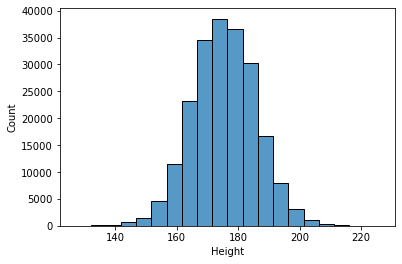

In [44]:
# Distribución de la altura de atletas olímpicos:

seaborn.histplot(olympics, x='Height', bins=20)
#ancho del rectángulo se mide en "bins"

In [45]:
#Otro modo,usando el paquete Numpy (no acepta valores Nulos)
import numpy

numpy.histogram(olympics['Height'].dropna(), bins = 15)  #dropna, borra valores Nulos

(array([   27,   188,   641,  3045,  8259, 29568, 50285, 42460, 47224,
        18478,  8170,  2095,   362,   126,    17], dtype=int64),
 array([127. , 133.6, 140.2, 146.8, 153.4, 160. , 166.6, 173.2, 179.8,
        186.4, 193. , 199.6, 206.2, 212.8, 219.4, 226. ]))

## Seaborn y Matplotlib

Ambos son muy útiles para graficar histogramas

In [46]:
import seaborn
import matplotlib.pyplot as plt

In [47]:
olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


<AxesSubplot:ylabel='Frequency'>

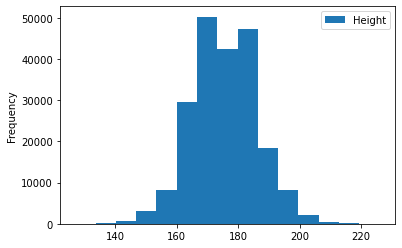

In [48]:
#Modo1
#graficamos usando matplotlib
olympics.plot(kind = 'hist', y = 'Height', bins = 15)

(array([2.7000e+01, 1.8800e+02, 6.4100e+02, 3.0450e+03, 8.2590e+03,
        2.9568e+04, 5.0285e+04, 4.2460e+04, 4.7224e+04, 1.8478e+04,
        8.1700e+03, 2.0950e+03, 3.6200e+02, 1.2600e+02, 1.7000e+01]),
 array([127. , 133.6, 140.2, 146.8, 153.4, 160. , 166.6, 173.2, 179.8,
        186.4, 193. , 199.6, 206.2, 212.8, 219.4, 226. ]),
 <BarContainer object of 15 artists>)

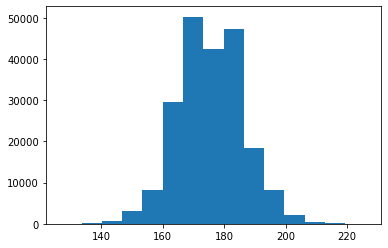

In [49]:
#Modo2
#El primer array: Los elemento que caben en los bins
#El segundo array: Los extremos de los bins
plt.hist(olympics['Height'], bins=15)

<AxesSubplot:ylabel='Frequency'>

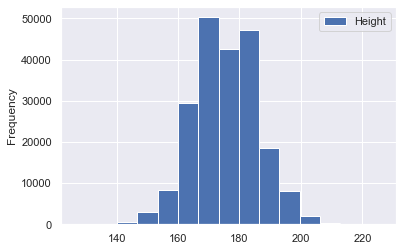

In [50]:
#Modo3
#Usando el estilo de seaborn
seaborn.set()   #Solo se cambia el estilo.
olympics.plot(kind='hist', y='Height', bins=15) #Misma sintaxis de Matplotlib


In [51]:
#Para quitar el stilo seaborn, usamos:
seaborn.reset_orig()

<AxesSubplot:ylabel='Frequency'>

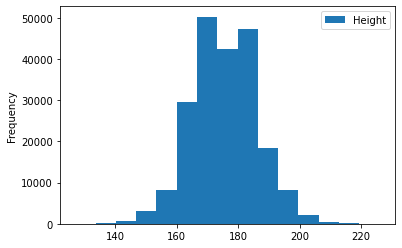

In [52]:
#Volvemos a ejecutar la misma sintaxis:
olympics.plot(kind='hist', y='Height', bins=15)

**Se vuelve a ejecutar las mismas gráficas, quitando el estilo seaborn**

**Hasta ahora, se han hechos gráficos uniendo a todos los atletas. Esta vez, se hará el gráfico quitando esta agrupación.**
### Combinaremos Pandas y Seaborn

In [53]:
#Verificamos un par de deportes que tenemos en nuestro dataset:
olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [54]:
#Elegimos la columna sport para el análisis.
olympics['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [55]:
# Elegimos dos deportes, donde suponemos que hay diferencias de alturas considerables.
basket_gym = olympics[olympics['Sport'].isin(['Basketball', 'Gymnastics'])]

In [56]:
basket_gym.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


**Graficamos, usando nuestro nuevo dataframe**

<AxesSubplot:xlabel='Height', ylabel='Count'>

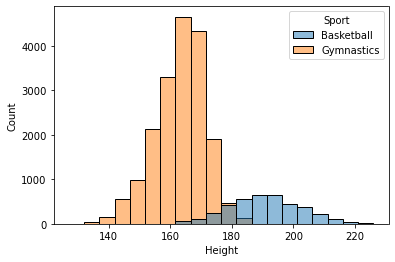

In [57]:
seaborn.histplot(basket_gym, x='Height', bins=20, hue='Sport')

## Boxplot: Diagrama de Cajas

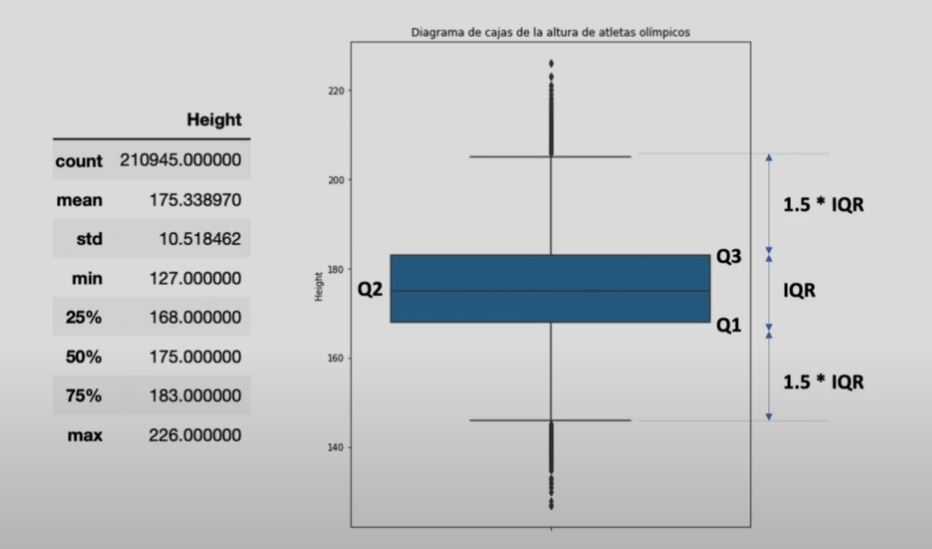

`seaborn.boxplot` https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Recuerda: IQR: Rango Interquartil = Q3 - Q1 , representa el 50% que se encuentra en el centro**

<AxesSubplot:ylabel='Height'>

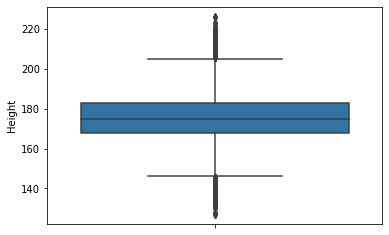

In [58]:
seaborn.boxplot(data=olympics, y='Height')

<AxesSubplot:ylabel='Height'>

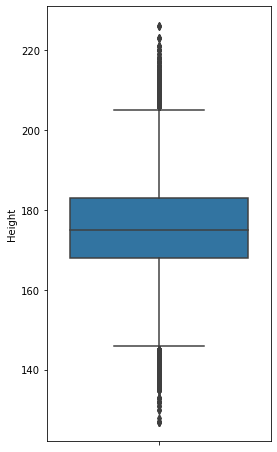

In [59]:
plt.figure(figsize=(4, 8))  #4: tamaño horizontal #8:tamaño vertical.

seaborn.boxplot(data=olympics, y='Height')

**También podemos obtener un diagrama de cajas, separados por distintos valores para alguna columna categórica:**

In [60]:
#Revisemos nuevamente nuestro dataset:
basket_gym.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


<AxesSubplot:ylabel='Height'>

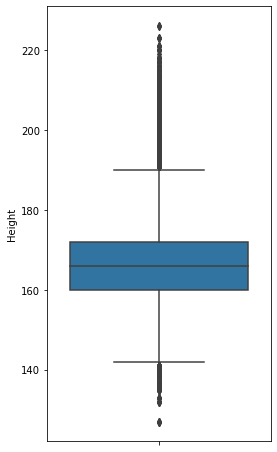

In [61]:
#Gráfico de cajas de nuestro dataset:
plt.figure(figsize =(4,8))

seaborn.boxplot(data=basket_gym, y='Height')
#los outlier hacia arriba, probablemente sea de los basketbolistas.
#los outlier hacia abajo, probablemente sea de los gimnastas.

<AxesSubplot:xlabel='Sport', ylabel='Height'>

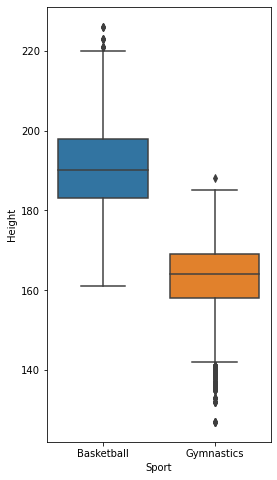

In [62]:
#Separamos ambos deportes y los analizamos respecto a sus alturas.
plt.figure(figsize =(4,8))

seaborn.boxplot(data=basket_gym, y='Height', x='Sport') #En el eje X se diferenciarán a los deportes.

**Notamos que el outlier hacia arriba de los gimnastas, es una talla normal para los basquetbolistas.**

## Histograma vs Boxplot : ¿Cuál es mejor?

<AxesSubplot:xlabel='Height', ylabel='Count'>

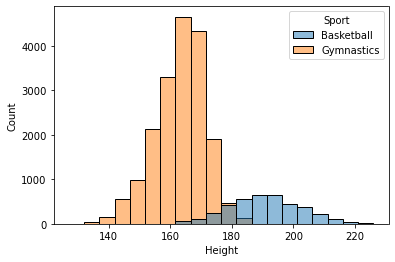

In [63]:
seaborn.histplot(basket_gym, x='Height', bins=20, hue = 'Sport')

#El agregado de esta gráfica es la cantidad exacta

<AxesSubplot:xlabel='Sport', ylabel='Height'>

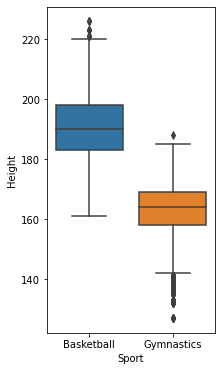

In [64]:
plt.figure(figsize = (3,6))

seaborn.boxplot(data = basket_gym, y ='Height', x= 'Sport')

#La ventaja es que podemos ver en dónde está el 50% de los datos de ambos grupos.

**En resumen, ambas gráficas son muy buenas y no deberían de faltar en nuestro análisis de datos.**

## Correlación de Pearson

In [65]:
#Análisis Bivariado: basket vs gimanastas
basket_gym.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


<AxesSubplot:xlabel='Height', ylabel='Weight'>

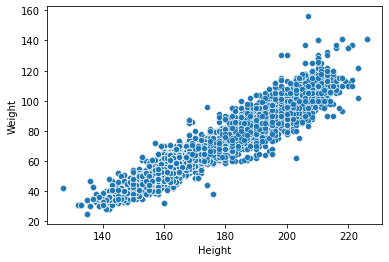

In [66]:
#Hipótesis: A mayor altura => Mayor peso.
seaborn.scatterplot(data= basket_gym, x='Height', y = 'Weight')

<AxesSubplot:xlabel='Height', ylabel='Age'>

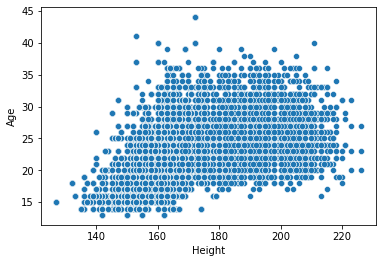

In [67]:
#Hipótesis: A mayor edad, mayor altura. (No siempre)
seaborn.scatterplot(data=basket_gym, x='Height', y='Age')

### Fórmula de correlación de Pearson
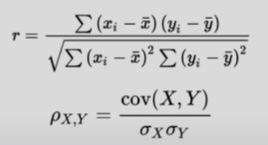

In [77]:
#Solo nos quedamos con algunas columnas:
matriz = basket_gym[['Age', 'Height', 'Weight', 'Sport']]

matriz.head()

,Age,Height,Weight,Sport
0,24.0,180.0,80.0,Basketball
41,28.0,175.0,64.0,Gymnastics
42,28.0,175.0,64.0,Gymnastics
43,28.0,175.0,64.0,Gymnastics
44,28.0,175.0,64.0,Gymnastics


In [81]:
#Solo considera a las variables numéricas:
matriz_correlacion = matriz.corr()

matriz_correlacion

,Age,Height,Weight
Age,1.000000,0.458235,0.525656
Height,0.458235,1.000000,0.936603
Weight,0.525656,0.936603,1.000000


## ¿Cómo identificamos a los de mayor correlación cuando hay varias columnas?

## Usaremos: Heatmap

<AxesSubplot:>

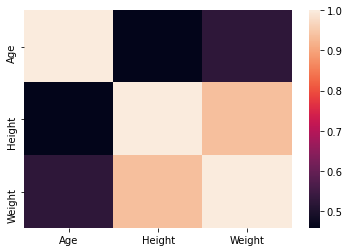

In [82]:
#Visualización en base a colores
seaborn.heatmap(matriz_correlacion)

<AxesSubplot:>

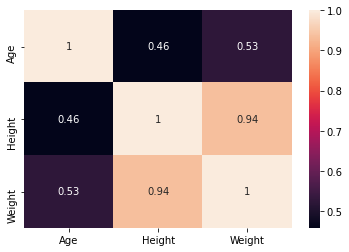

In [84]:
#Mejorado:annot, para que se visualice las valores de correlación
seaborn.heatmap(matriz_correlacion, annot= True)

## Pairplot

**Obtener un gráfico que muestre relaciones entre variables numéricas**

**Es el mejor gráfico de relación de ´seaborn´ por el profesor.**

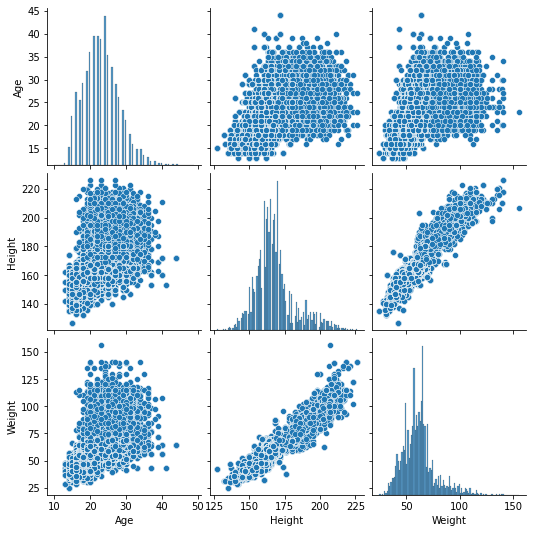

In [85]:
seaborn.pairplot(basket_gym[['Age', 'Height', 'Weight', 'Sport']])

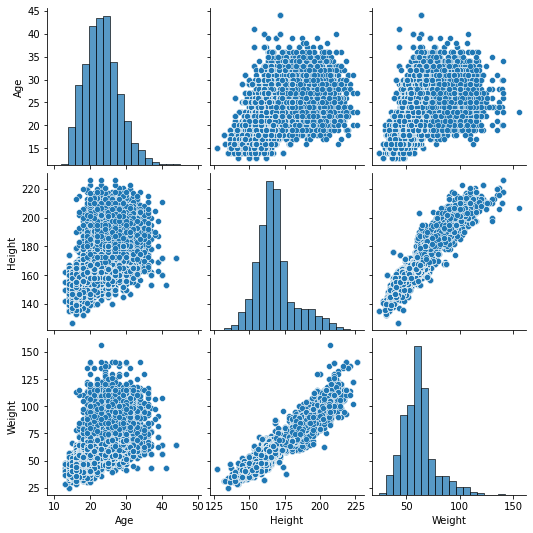

In [89]:
#Mejorado la anchura de la diagonal
seaborn.pairplot(basket_gym[['Age', 'Height', 'Weight', 'Sport']], diag_kws={'bins':20})

**Diferenciando Deportes: Basket vs Gym**

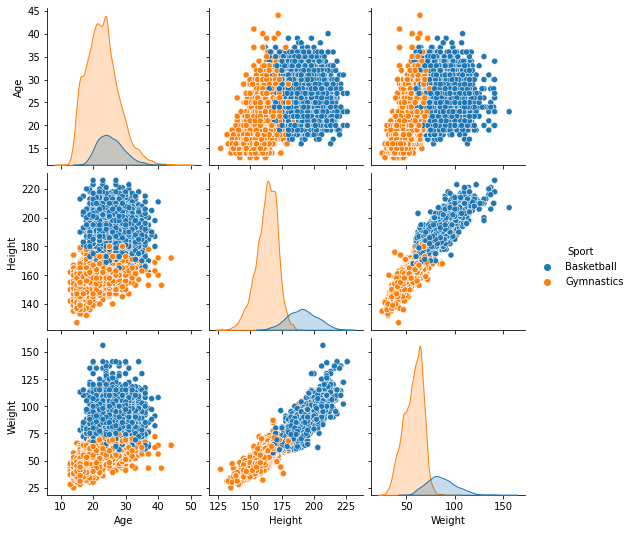

In [92]:
seaborn.pairplot(basket_gym[['Age', 'Height', 'Weight', 'Sport']], hue='Sport')

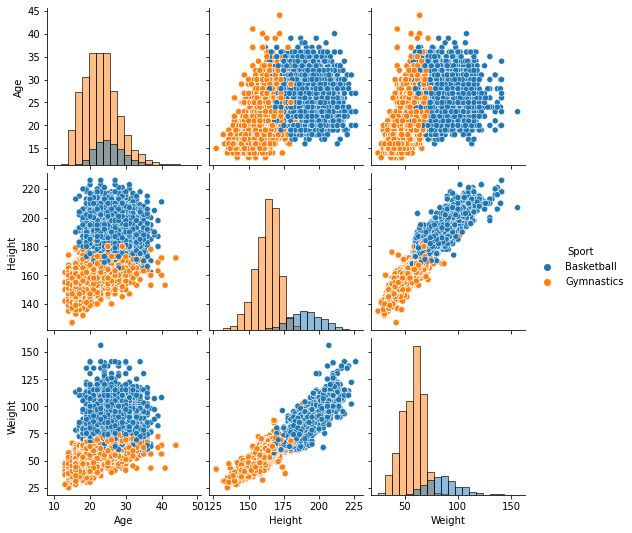

In [93]:
#Gráfica de histograma, con bins = 20
seaborn.pairplot(basket_gym[['Age', 'Height', 'Weight', 'Sport']], hue='Sport',
                diag_kind='hist', diag_kws={'bins':20})